In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
file_path ="titanic_disaster.csv"
df = pd.read_csv(file_path)

In [6]:
#cau 1
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

In [7]:
data = load_data(file_path)
print(data.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

In [8]:
# thong ke du lieu thieu 
missing_data = data.isnull().sum()

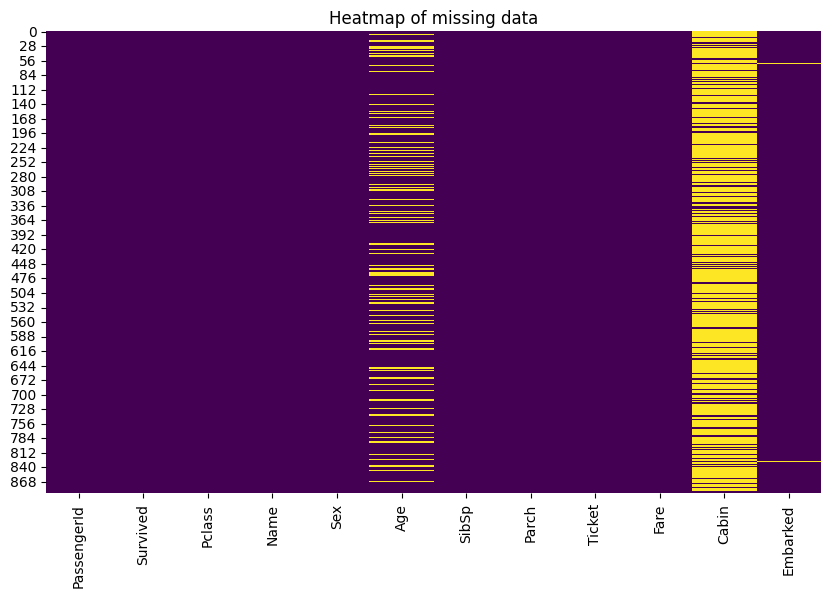

cột Age: nhiều giá trị thiếu tùm lum
cột Cabin: Nhiều giá trị cũng bị thiếu nhưng có thể cần xử lý hoặc bỏ qua luôn cột này
cột Embarked: Chỉ có một vài giá trị bị thiếu.


In [9]:
def visualize_missing_data(data):
    plt.figure(figsize=(10,6))
    #ve heatmap dữ liệu thiếu 
    # data.isnull() trả về một DataFrame cùng kích thước với data, nhưng chứa giá trị True ở những vị trí có dữ liệu thiếu (NaN) và False ở những vị trí không thiếu dữ liệu.
    #data.isnull() xác định vị trí dữ liệu thiéu
    #cbar=False bỏ qua thanh màu (color bar)
    # cmap='viridis' chỉ định bảng màu cho heat map , viridis này chuyển đổi các giá trị true/false thành các màu tương ứng để phân biệt 
    sns.heatmap(data.isnull(),cbar=False,cmap='viridis')
    plt.title('Heatmap of missing data')
    plt.show()
# truc quan hoa du lieu thieu
visualize_missing_data(data)
# nhận xét 
print("cột Age: nhiều giá trị thiếu tùm lum")
print("cột Cabin: Nhiều giá trị cũng bị thiếu nhưng có thể cần xử lý hoặc bỏ qua luôn cột này")
print("cột Embarked: Chỉ có một vài giá trị bị thiếu.")

In [10]:
print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [11]:
def split_name(data):
    if 'Name' in data.columns:
        # Tách cột 'Name' thành hai phần
        name_split = data['Name'].str.split(', ', n=1, expand=True)
        data['firstName'] = name_split[1].str.strip()
        data['secondName'] = name_split[0].str.strip()
        
        # Xóa cột 'Name'
        data.drop(columns=['Name'], inplace=True)
    return data
        
data=split_name(data)
split_name(data)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr. Owen Harris,Braund
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs. John Bradley (Florence Briggs Thayer),Cumings
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss. Laina,Heikkinen
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs. Jacques Heath (Lily May Peel),Futrelle
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr. William Henry,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,Rev. Juozas,Montvila
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Miss. Margaret Edith,Graham
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,"Miss. Catherine Helen ""Carrie""",Johnston
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,Mr. Karl Howell,Behr


In [12]:
# cau 4 Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male  M và female  F
def simplify_sex(data):
    data['Sex'] = data['Sex'].map({'male': 'M', 'female': 'F'})
    return data

data = simplify_sex(data)
print(data.head(10))


   PassengerId  Survived  Pclass Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3   M  22.0      1      0         A/5 21171   
1            2         1       1   F  38.0      1      0          PC 17599   
2            3         1       3   F  26.0      0      0  STON/O2. 3101282   
3            4         1       1   F  35.0      1      0            113803   
4            5         0       3   M  35.0      0      0            373450   
5            6         0       3   M   NaN      0      0            330877   
6            7         0       1   M  54.0      0      0             17463   
7            8         0       3   M   2.0      3      1            349909   
8            9         1       3   F  27.0      0      2            347742   
9           10         1       2   F  14.0      1      0            237736   

      Fare Cabin Embarked                                   firstName  \
0   7.2500   NaN        S                             Mr. Owen Harri

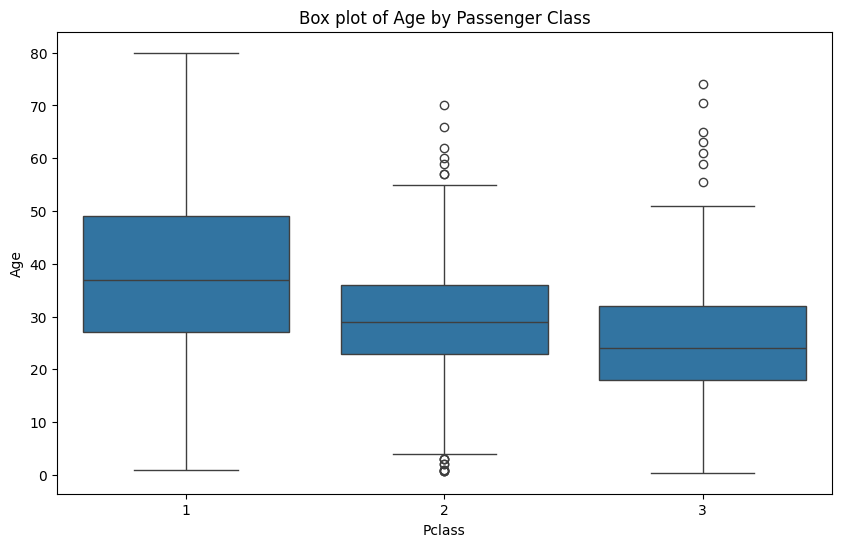

In [13]:
# câu 5 xử lý dữ liệu trên biến age
def plot_age_by_pclass(data):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Pclass', y='Age', data=data)
    plt.title('Box plot of Age by Passenger Class')
    plt.show()

plot_age_by_pclass(data)



   PassengerId  Survived  Pclass Sex       Age  SibSp  Parch  \
0            1         0       3   M  22.00000      1      0   
1            2         1       1   F  38.00000      1      0   
2            3         1       3   F  26.00000      0      0   
3            4         1       1   F  35.00000      1      0   
4            5         0       3   M  35.00000      0      0   
5            6         0       3   M  25.14062      0      0   
6            7         0       1   M  54.00000      0      0   
7            8         0       3   M   2.00000      3      1   
8            9         1       3   F  27.00000      0      2   
9           10         1       2   F  14.00000      1      0   

             Ticket     Fare Cabin Embarked  \
0         A/5 21171   7.2500   NaN        S   
1          PC 17599  71.2833   C85        C   
2  STON/O2. 3101282   7.9250   NaN        S   
3            113803  53.1000  C123        S   
4            373450   8.0500   NaN        S   
5            

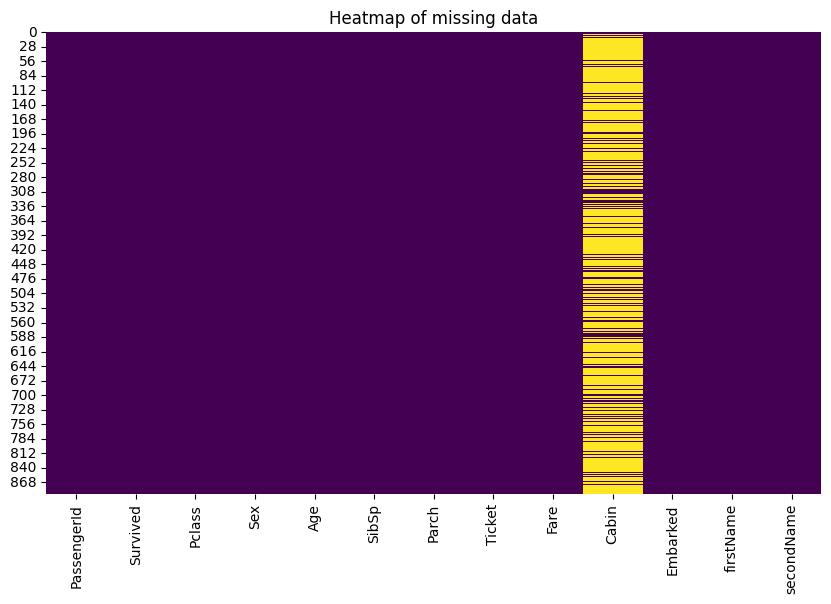

In [14]:
# sau khi xử lý xong thì thay thế giá trị bị thiếu 
def fill_missing_age(data):
    data['Age'] = data.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))
    return data

data = fill_missing_age(data)
print(data.head(10))
visualize_missing_data(data)


In [15]:
#câu 6
def create_age_group(data):
    bins = [0, 12, 18, 60, float('inf')]
    labels = ['Kid', 'Teen', 'Adult', 'Older']
    data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
    return data

data = create_age_group(data)
print(data[['Age', 'AgeGroup']].head(10))


        Age AgeGroup
0  22.00000    Adult
1  38.00000    Adult
2  26.00000    Adult
3  35.00000    Adult
4  35.00000    Adult
5  25.14062    Adult
6  54.00000    Adult
7   2.00000      Kid
8  27.00000    Adult
9  14.00000     Teen


In [16]:
# câu 7
def extract_name_prefix(data):
    data['namePrefix'] = data['firstName'].str.extract(' ([A-Za-z]+)\.', expand=False)
    return data

data = extract_name_prefix(data)
print(data[['firstName', 'namePrefix']].head(10))


                                    firstName namePrefix
0                             Mr. Owen Harris        NaN
1  Mrs. John Bradley (Florence Briggs Thayer)        NaN
2                                 Miss. Laina        NaN
3          Mrs. Jacques Heath (Lily May Peel)        NaN
4                           Mr. William Henry        NaN
5                                   Mr. James        NaN
6                               Mr. Timothy J        NaN
7                       Master. Gosta Leonard        NaN
8    Mrs. Oscar W (Elisabeth Vilhelmina Berg)        NaN
9                 Mrs. Nicholas (Adele Achem)        NaN


<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
C:\Users\ACER\AppData\Local\Temp\ipykernel_14208\2558477675.py:3: SyntaxWarning: invalid escape sequence '\.'
  data['namePrefix'] = data['firstName'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [17]:
#cau 8
data['familySize'] = 1 + data['SibSp'] + data['Parch']

print(data[["firstName", 'familySize']])

                                      firstName  familySize
0                               Mr. Owen Harris           2
1    Mrs. John Bradley (Florence Briggs Thayer)           2
2                                   Miss. Laina           1
3            Mrs. Jacques Heath (Lily May Peel)           2
4                             Mr. William Henry           1
..                                          ...         ...
886                                 Rev. Juozas           1
887                        Miss. Margaret Edith           1
888              Miss. Catherine Helen "Carrie"           4
889                             Mr. Karl Howell           1
890                                 Mr. Patrick           1

[891 rows x 2 columns]


In [18]:
#cau 9  if familySize = 0 thì giá trị Alone = 1 và ngược lại là 0.
# Tạo đặc trưng Alone
data['Alone'] = 0
data.loc[data['familySize'] == 0, 'Alone'] = 1

print(data[['firstName', 'familySize', 'Alone']])

                                      firstName  familySize  Alone
0                               Mr. Owen Harris           2      0
1    Mrs. John Bradley (Florence Briggs Thayer)           2      0
2                                   Miss. Laina           1      0
3            Mrs. Jacques Heath (Lily May Peel)           2      0
4                             Mr. William Henry           1      0
..                                          ...         ...    ...
886                                 Rev. Juozas           1      0
887                        Miss. Margaret Edith           1      0
888              Miss. Catherine Helen "Carrie"           4      0
889                             Mr. Karl Howell           1      0
890                                 Mr. Patrick           1      0

[891 rows x 3 columns]


In [19]:
#câu 10 
# Xử lý dữ liệu Cabin
def process_cabin(data):
    data['Cabin'].fillna('Unknown', inplace=True)  # Thay thế giá trị thiếu bằng 'Unknown'
    data['typeCabin'] = data['Cabin'].apply(lambda x: x[0] if x != 'Unknown' else 'Unknown')
    return data

# Áp dụng hàm vào DataFrame
data = process_cabin(data)

print(data[['firstName', 'Cabin', 'typeCabin']])

                                      firstName    Cabin typeCabin
0                               Mr. Owen Harris  Unknown   Unknown
1    Mrs. John Bradley (Florence Briggs Thayer)      C85         C
2                                   Miss. Laina  Unknown   Unknown
3            Mrs. Jacques Heath (Lily May Peel)     C123         C
4                             Mr. William Henry  Unknown   Unknown
..                                          ...      ...       ...
886                                 Rev. Juozas  Unknown   Unknown
887                        Miss. Margaret Edith      B42         B
888              Miss. Catherine Helen "Carrie"  Unknown   Unknown
889                             Mr. Karl Howell     C148         C
890                                 Mr. Patrick  Unknown   Unknown

[891 rows x 3 columns]


C:\Users\ACER\AppData\Local\Temp\ipykernel_14208\3649093234.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Cabin'].fillna('Unknown', inplace=True)  # Thay thế giá trị thiếu bằng 'Unknown'


PHẦN 2: KHAI THÁC THÔNG TIN HỮU ÍCH – EDA

In [20]:
#câu 12 Trực quan thông tin tương quan tỉ lệ sống sót và thiệt mạng trên từng nhóm giới tính
Sur_Sex= df.groupby(['Survived', 'Sex'])[['Survived']].count()
Sur_Sex

Survived
Survived Sex             
0        female        81
         male         468
1        female       233
         male         109

In [21]:
unstackSur_Sex = Sur_Sex.unstack()
unstackSur_Sex 

Survived     
Sex        female male
Survived              
0              81  468
1             233  109

<Axes: xlabel='Survived'>

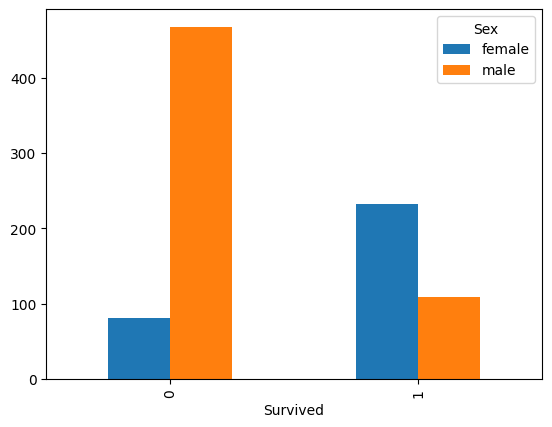

In [22]:
# Trực quan thông tin tương quan tỉ lệ 
#sống sót và thiệt mạng (Survived) trên từng nhóm giới tính (Sex).
unstackSur_Sex['Survived'].plot.bar()

<Axes: xlabel='Survived', ylabel='Age'>

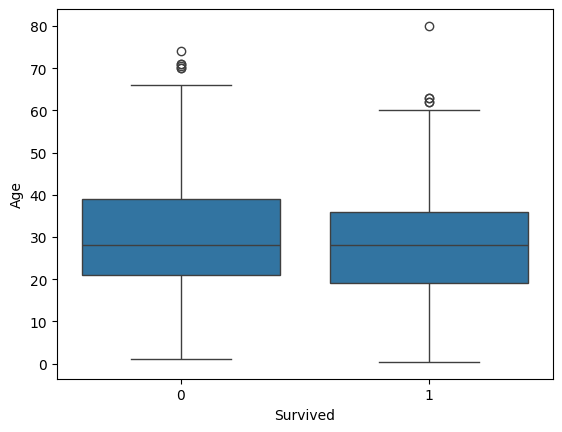

In [23]:
sns.boxplot(y='Age', x='Survived', data = df)

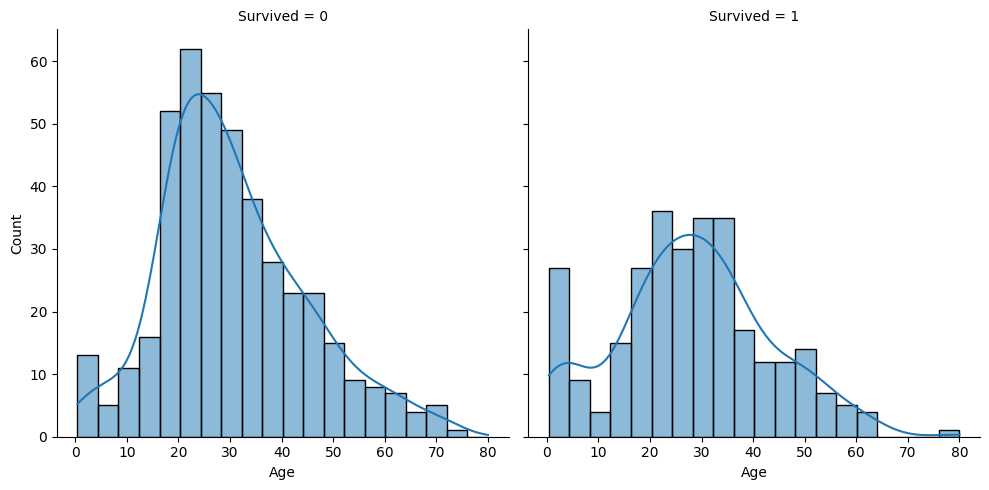

In [24]:
sns.displot(df, x="Age", col="Survived", kde=True)

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


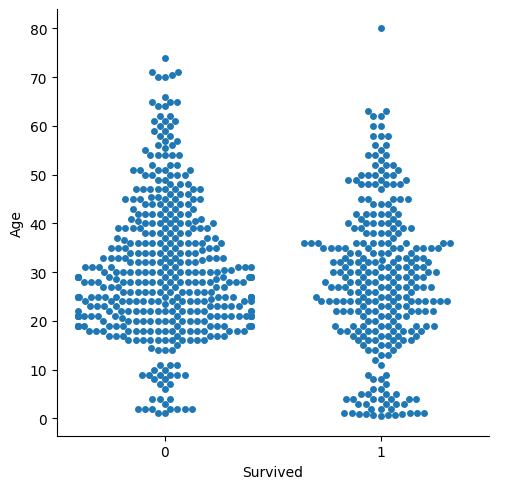

In [25]:
sns.catplot(x="Survived", y="Age", kind="swarm",data=df)

In [26]:
#13. Trực quan thông tin hành khách sống sót trên từng nhóm phân loại hành khách (Pclass).
Sur_Pclass= df.groupby(['Survived', 'Pclass'])[['Survived']].count()
Sur_Pclass

Survived
Survived Pclass          
0        1             80
         2             97
         3            372
1        1            136
         2             87
         3            119

In [27]:
unstackSur_Pclass = Sur_Pclass.unstack()
unstackSur_Pclass

Survived         
Pclass          1   2    3
Survived                  
0              80  97  372
1             136  87  119

<Axes: xlabel='Survived'>

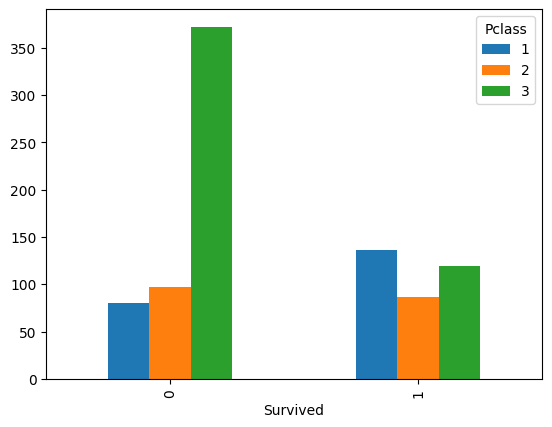

In [28]:
unstackSur_Pclass['Survived'].plot.bar()

<Axes: xlabel='Pclass', ylabel='Survived'>

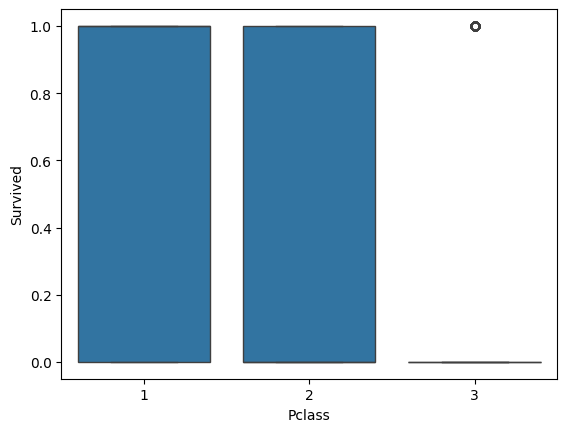

In [29]:
sns.boxplot(y='Survived', x='Pclass', data = df)

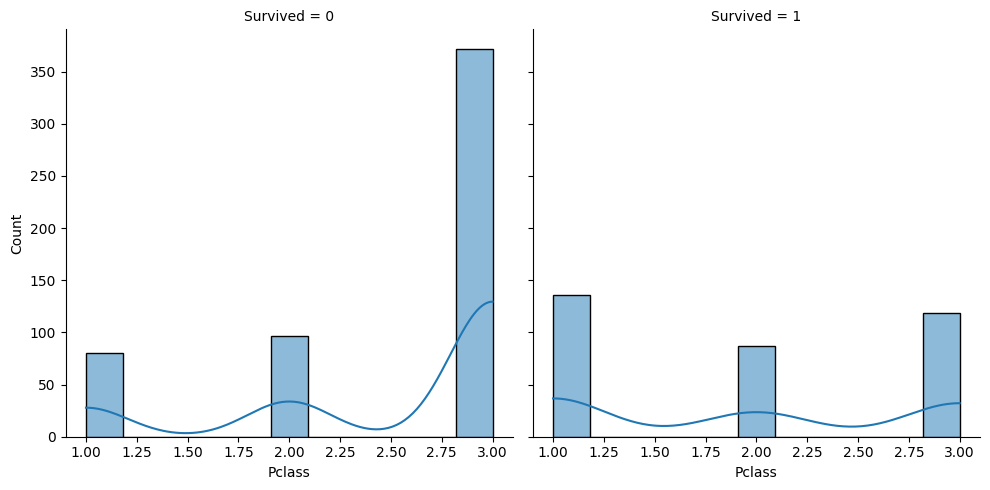

In [30]:
sns.displot(df, x="Pclass", col="Survived", kde=True)

In [ ]:
#14. Trực quan thông tin hành khách sống sót trên từng nhóm giới tính và thang đo tuổi tác
Sur_Sex_Agegroup = df.groupby(['Survived','Sex','AgeGroup'])[['Survived']].count()
Sur_Sex_Agegroup

In [ ]:
unstackSur_Sex_Agegroup['Survived'].plot.bar()

In [ ]:
sns.catplot(x="Survived", y="Age", hue='Agegroup', kind="swarm",data=df)

In [ ]:
#15 Trực quan xác suất hành khách sống sót dựa trên thông tin nhóm đi cùng
Sur_familySize= df.groupby(['Survived', 'familySize'])[['Survived']].count()
unstackSur_familySize = Sur_familySize.unstack()
unstackSur_familySize

In [ ]:
unstackSur_familySize['Survived'].plot.bar()

In [ ]:
sns.boxplot(y='Survived', x='familySize', data = df)

In [ ]:
sns.displot(df, x="familySize", col="Survived", kde=True)

In [ ]:
sns.catplot(x="Survived", y="familySize", kind="swarm",data=df)

In [ ]:
Sur_Fare= df.groupby(['Survived', 'Fare'])[['Survived']].count()
unstackSur_Fare = Sur_Fare.unstack()
unstackSur_Fare

Survived                                                        \
Fare     0.0000   4.0125   5.0000   6.2375   6.4375   6.4500   6.4958     
Survived                                                                  
0            14.0      1.0      1.0      1.0      1.0      1.0      2.0   
1             1.0      NaN      NaN      NaN      NaN      NaN      NaN   

                                     ...                                      \
Fare     6.7500   6.8583   6.9500    ... 153.4625 164.8667 211.3375 211.5000   
Survived                             ...                                       
0             2.0      1.0      1.0  ...      1.0      NaN      NaN      1.0   
1             NaN      NaN      NaN  ...      2.0      2.0      3.0      NaN   

                                                                
Fare     221.7792 227.5250 247.5208 262.3750 263.0000 512.3292  
Survived                                                        
0             1.0      1.0      1.0      NaN      2.0      NaN  
1             NaN      3.0      1.0      2.0      2.0      3.0  

[2 rows x 248 columns]

<Axes: xlabel='Survived', ylabel='Fare'>

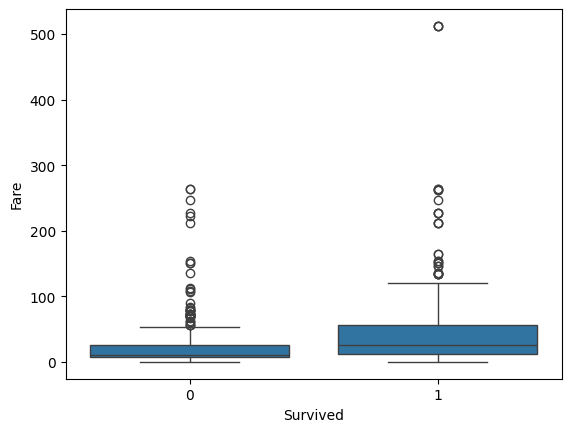

In [ ]:
sns.boxplot(y='Fare', x='Survived', data = df)

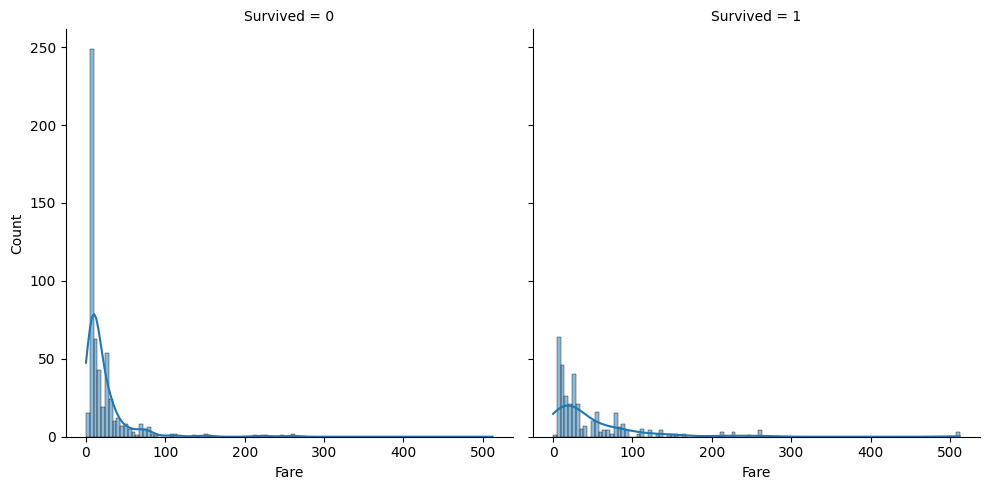

In [ ]:
sns.displot(df, x="Fare", col="Survived", kde=True)

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 57.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 68.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 44.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 43.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


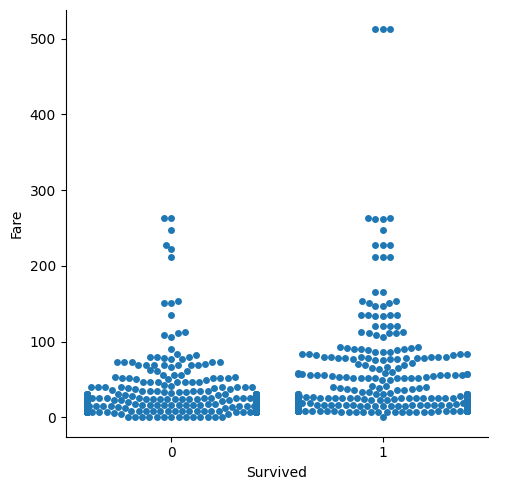

In [ ]:
sns.catplot(x="Survived", y="Fare", kind="swarm",data=df)

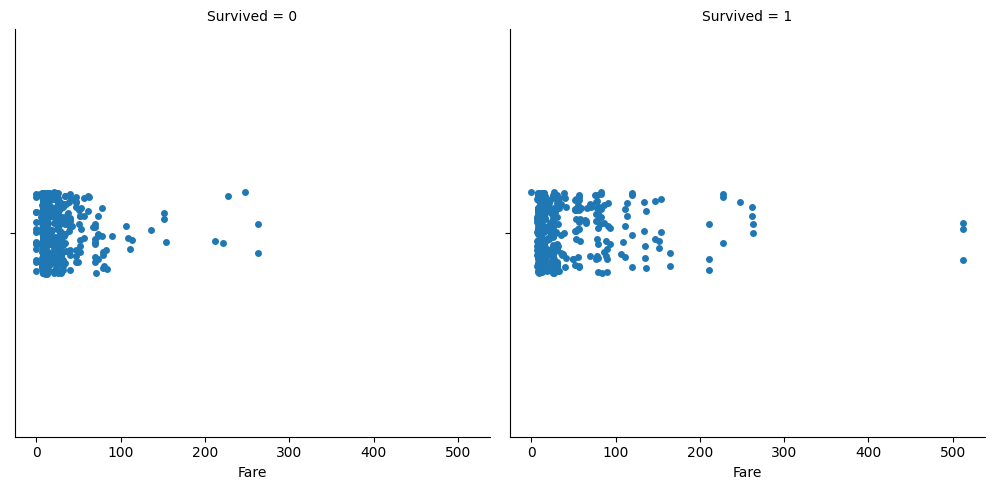

In [ ]:
sns.catplot(x='Fare', col='Survived', data=df)

In [ ]:
Sur_Pclass_Embarked= df.groupby(['Survived', 'Embarked','Pclass'])[['Survived']].count()
unstackSur_Pclass_Embarked = Sur_Pclass_Embarked.unstack()
unstackSur_Pclass_Embarked

Survived         
Pclass                   1   2    3
Survived Embarked                  
0        C              26   8   41
         Q               1   1   45
         S              53  88  286
1        C              59   9   25
         Q               1   2   27
         S              74  76   67

<Axes: ylabel='Survived,Embarked'>

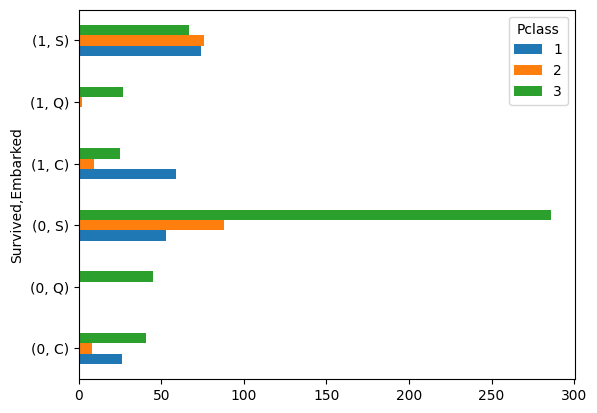

In [ ]:
unstackSur_Pclass_Embarked['Survived'].plot.barh()

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 90.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 64.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 66.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 93.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

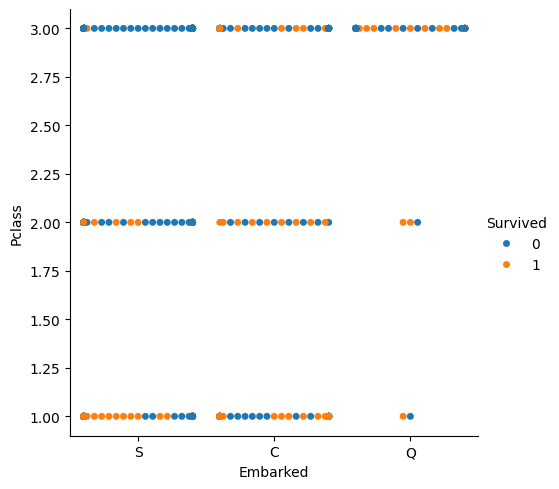

In [32]:
sns.catplot(x="Embarked", y="Pclass", hue='Survived', kind="swarm",data=df)

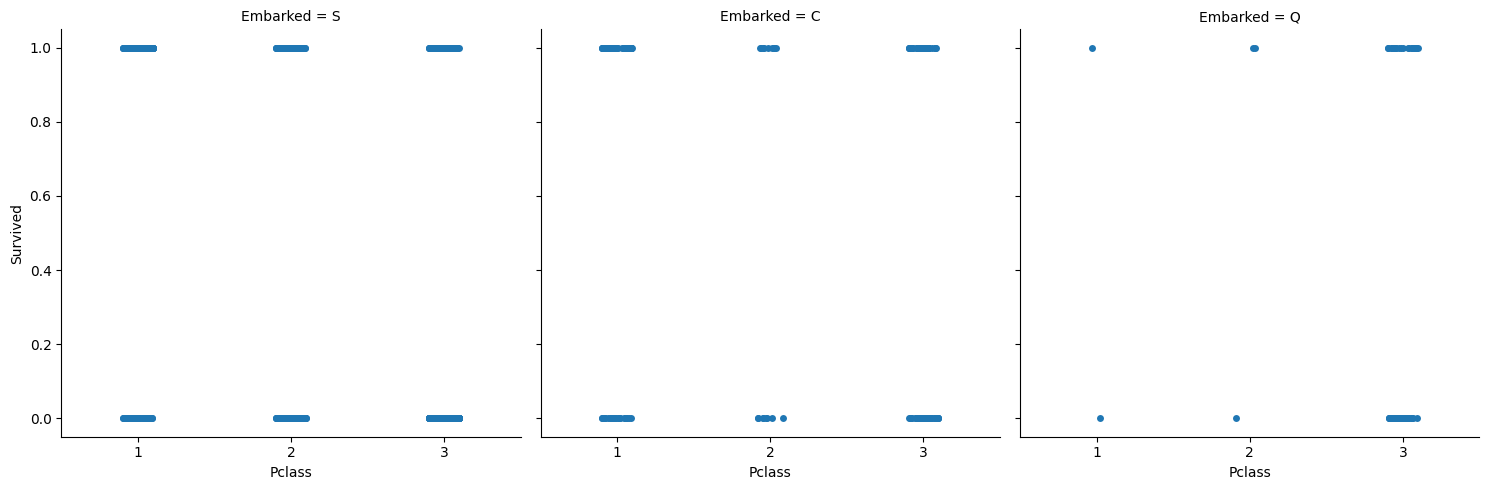

In [33]:
sns.catplot(x='Pclass', y='Survived', col='Embarked', data=df)